## 2024: Week 2 - Average Price Analysis
It's the second week of our introductory challenges. This week the challenge will involve unions, aggregation and reshaping data.
The input data set for this week is the output from week one.

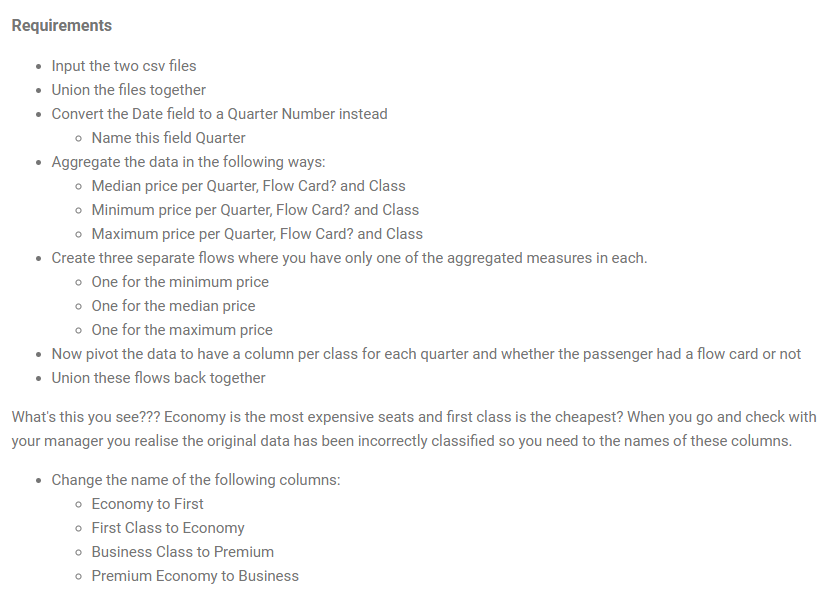

In [14]:
import pandas as pd

In [15]:
flow_card = pd.read_csv('./data/PD 2024 Wk 1 Output Flow Card.csv')
non_flow_card = pd.read_csv('./data/PD 2024 Wk 1 Output Non-Flow Card.csv')


In [16]:
flow_card.head(2)

,Date,Flight Number,From,To,Class,Price,Flow Card?,Bags Checked,Meal Type
0,22/07/2024,PA010,Tokyo,New York,Economy,2380.0,Yes,0,Egg Free
1,20/04/2024,PA002,New York,London,Economy,3490.0,Yes,1,Vegan


In [17]:
non_flow_card.head(2)

,Date,Flight Number,From,To,Class,Price,Flow Card?,Bags Checked,Meal Type
0,28/09/2024,PA008,Perth,New York,Economy,1855.0,No,2,Vegetarian
1,01/10/2024,PA008,Perth,New York,Business Class,634.8,No,0,Vegetarian


### 1. Union the files together

In [19]:
df = pd.concat((flow_card, non_flow_card), axis=0, ignore_index=True)

In [20]:
df.Date = pd.to_datetime(df.Date, dayfirst=True)

In [21]:
df.Date = df.Date.dt.to_period('Q').dt.strftime('%q')
df.rename(columns={'Date': 'Quarter'}, inplace=True)
df.head()

,Quarter,Flight Number,From,To,Class,Price,Flow Card?,Bags Checked,Meal Type
0,3,PA010,Tokyo,New York,Economy,2380.0,Yes,0,Egg Free
1,2,PA002,New York,London,Economy,3490.0,Yes,1,Vegan
2,1,PA010,Tokyo,New York,Premium Economy,825.0,Yes,1,Vegetarian
3,2,PA006,Tokyo,London,First Class,618.0,Yes,3,Vegan
4,1,PA004,Perth,London,First Class,446.0,Yes,1,Nut Free


In [22]:
df.groupby(['Quarter', 'Flow Card?', 'Class']).agg({'Price':['min', 'median', 'max']})

Price                 
                                       min   median     max
Quarter Flow Card? Class                                   
1       No         Business Class    241.2   574.80   834.0
                   Economy          1030.0  2340.00  3455.0
                   First Class       204.0   438.00   699.0
                   Premium Economy   515.0  1075.00  1702.5
        Yes        Business Class    249.6   523.20   840.0
                   Economy          1020.0  2325.00  3500.0
                   First Class       201.0   447.50   698.0
                   Premium Economy   502.5  1160.00  1737.5
2       No         Business Class    240.0   553.80   828.0
                   Economy          1000.0  2325.00  3480.0
                   First Class       202.0   445.00   694.0
                   Premium Economy   507.5  1205.00  1745.0
        Yes        Business Class    240.0   517.80   840.0
                   Economy          1020.0  2290.00  3490.0
                   First Class       200.0   459.00   696.0
                   Premium Economy   500.0  1071.25  1737.5
3       No         Business Class    240.0   490.80   838.8
                   Economy          1000.0  2285.00  3475.0
                   First Class       201.0   487.00   691.0
                   Premium Economy   517.5  1125.00  1747.5
        Yes        Business Class    241.2   553.80   840.0
                   Economy          1005.0  2347.50  3495.0
                   First Class       206.0   457.00   697.0
                   Premium Economy   502.5  1090.00  1750.0
4       No         Business Class    240.0   555.60   835.2
                   Economy          1015.0  2202.50  3465.0
                   First Class       200.0   428.00   698.0
                   Premium Economy   510.0  1062.50  1730.0
        Yes        Business Class    249.6   522.60   834.0
                   Economy          1030.0  2212.50  3460.0
                   First Class       205.0   424.00   697.0
                   Premium Economy   505.0  1108.75  1722.5

In [23]:
min_price = df.groupby(['Quarter', 'Flow Card?', 'Class'], as_index=False).Price.min()
med_price = df.groupby(['Quarter', 'Flow Card?', 'Class'], as_index=False).Price.median()
max_price = df.groupby(['Quarter', 'Flow Card?', 'Class'], as_index=False).Price.max()

In [24]:
min_price.head(4)

,Quarter,Flow Card?,Class,Price
0,1,No,Business Class,241.2
1,1,No,Economy,1030.0
2,1,No,First Class,204.0
3,1,No,Premium Economy,515.0


In [25]:
med_price.head(4)

,Quarter,Flow Card?,Class,Price
0,1,No,Business Class,574.8
1,1,No,Economy,2340.0
2,1,No,First Class,438.0
3,1,No,Premium Economy,1075.0


In [26]:
max_price.head(4)

,Quarter,Flow Card?,Class,Price
0,1,No,Business Class,834.0
1,1,No,Economy,3455.0
2,1,No,First Class,699.0
3,1,No,Premium Economy,1702.5


In [27]:
min_flow = min_price.pivot_table(index=['Flow Card?', 'Quarter'], columns='Class', values='Price', aggfunc='first').reset_index()
min_flow['agg_price'] = 'min'
min_flow.head(4)

Class,Flow Card?,Quarter,Business Class,Economy,First Class,Premium Economy,agg_price
0,No,1,241.2,1030.0,204.0,515.0,min
1,No,2,240.0,1000.0,202.0,507.5,min
2,No,3,240.0,1000.0,201.0,517.5,min
3,No,4,240.0,1015.0,200.0,510.0,min


In [28]:
med_flow = med_price.pivot_table(index=['Flow Card?', 'Quarter'], columns='Class', values='Price', aggfunc='first').reset_index()
med_flow['agg_price'] = 'median'
med_flow.head(4)

Class,Flow Card?,Quarter,Business Class,Economy,First Class,Premium Economy,agg_price
0,No,1,574.8,2340.0,438.0,1075.0,median
1,No,2,553.8,2325.0,445.0,1205.0,median
2,No,3,490.8,2285.0,487.0,1125.0,median
3,No,4,555.6,2202.5,428.0,1062.5,median


In [29]:
max_flow = max_price.pivot_table(index=['Flow Card?', 'Quarter'], columns='Class', values='Price', aggfunc='first').reset_index()
max_flow['agg_price'] = 'max'
max_flow.head(4)

Class,Flow Card?,Quarter,Business Class,Economy,First Class,Premium Economy,agg_price
0,No,1,834.0,3455.0,699.0,1702.5,max
1,No,2,828.0,3480.0,694.0,1745.0,max
2,No,3,838.8,3475.0,691.0,1747.5,max
3,No,4,835.2,3465.0,698.0,1730.0,max


In [30]:
flows = pd.concat((min_flow, med_flow, max_flow), ignore_index=True)
flows

Class,Flow Card?,Quarter,Business Class,Economy,First Class,Premium Economy,agg_price
0,No,1,241.2,1030.0,204.0,515.00,min
1,No,2,240.0,1000.0,202.0,507.50,min
2,No,3,240.0,1000.0,201.0,517.50,min
3,No,4,240.0,1015.0,200.0,510.00,min
4,Yes,1,249.6,1020.0,201.0,502.50,min
5,Yes,2,240.0,1020.0,200.0,500.00,min
6,Yes,3,241.2,1005.0,206.0,502.50,min
7,Yes,4,249.6,1030.0,205.0,505.00,min
8,No,1,574.8,2340.0,438.0,1075.00,median
9,No,2,553.8,2325.0,445.0,1205.00,median


In [31]:
new_classes = {'Economy': 'First', 'First Class': 'Economy', 'Business Class': 'Premium', 'Premium Economy': 'Business'}
flows = flows.rename(columns=new_classes)

In [32]:
flows = flows[['Flow Card?', 'Quarter', 'Economy', 'Premium', 'Business', 'First', 'agg_price']]
flows.head()

Class,Flow Card?,Quarter,Economy,Premium,Business,First,agg_price
0,No,1,204.0,241.2,515.0,1030.0,min
1,No,2,202.0,240.0,507.5,1000.0,min
2,No,3,201.0,240.0,517.5,1000.0,min
3,No,4,200.0,240.0,510.0,1015.0,min
4,Yes,1,201.0,249.6,502.5,1020.0,min


In [33]:
flows[flows.agg_price == 'median']

Class,Flow Card?,Quarter,Economy,Premium,Business,First,agg_price
8,No,1,438.0,574.8,1075.00,2340.0,median
9,No,2,445.0,553.8,1205.00,2325.0,median
10,No,3,487.0,490.8,1125.00,2285.0,median
11,No,4,428.0,555.6,1062.50,2202.5,median
12,Yes,1,447.5,523.2,1160.00,2325.0,median
13,Yes,2,459.0,517.8,1071.25,2290.0,median
14,Yes,3,457.0,553.8,1090.00,2347.5,median
15,Yes,4,424.0,522.6,1108.75,2212.5,median
